In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
url = "https://api.db.nomics.world/v22/series/AMECO/UDGG.csv?dimensions=%7B%22freq%22%3A%5B%22a%22%5D%2C%22unit%22%3A%5B%22percentage-of-gdp-at-current-prices-excessive-deficit-procedure%22%5D%2C%22geo%22%3A%5B%22deu%22%2C%22ita%22%2C%22fra%22%2C%22esp%22%5D%7D&limit=1000"

df_debt = pd.read_csv(url)

In [3]:
df_debt.tail()

,period,Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Germany (AMECO/UDGG/DEU.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Spain (AMECO/UDGG/ESP.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – France (AMECO/UDGG/FRA.1.0.319.0.UDGG),Annually – (Percentage of GDP at current prices (excessive deficit procedure)) – Italy (AMECO/UDGG/ITA.1.0.319.0.UDGG)
62,2022,64.9973,109.4986,111.2294,138.3491
63,2023,62.8777,105.1424,109.8822,134.7936
64,2024,62.9665,102.2598,112.7207,136.5627
65,2025,63.1568,101.2587,115.2961,138.2173
66,2026,62.8190,101.1439,117.0633,139.2769


In [4]:
#Daten lokal speichern
df_debt.to_csv('df_debt.csv', sep = ',', index = False)

In [5]:
#Spalten umbennen 
new_names = {
df_debt.columns[0]: 'Year',
df_debt.columns[1]: 'Germany',
df_debt.columns[2]: 'Spain',
df_debt.columns[3]: 'France',
df_debt.columns[4]: 'Italy',
}

df_debt = df_debt.rename(columns = new_names)
df_debt.head()

,Year,Germany,Spain,France,Italy
0,1960,NaN,NaN,NaN,31.7222
1,1961,NaN,NaN,NaN,29.8648
2,1962,NaN,NaN,NaN,28.7243
3,1963,NaN,NaN,NaN,26.7858
4,1964,NaN,NaN,NaN,26.6171


In [6]:
df_debt.isna().sum()

Year        0
Germany    35
Spain      35
France     35
Italy       0
dtype: int64

In [7]:
df_debt = df_debt.dropna()
df_debt.head()

,Year,Germany,Spain,France,Italy
35,1995,54.7487,61.5864,57.8050,119.0877
36,1996,57.5788,65.4420,60.5935,118.8964
37,1997,58.6861,64.2863,61.9832,116.4905
38,1998,59.3024,62.3547,62.0997,113.8868
39,1999,59.8711,60.8531,61.4231,113.0585


In [8]:
df_debt = df_debt.reset_index(drop = True)
df_debt.head()

,Year,Germany,Spain,France,Italy
0,1995,54.7487,61.5864,57.8050,119.0877
1,1996,57.5788,65.4420,60.5935,118.8964
2,1997,58.6861,64.2863,61.9832,116.4905
3,1998,59.3024,62.3547,62.0997,113.8868
4,1999,59.8711,60.8531,61.4231,113.0585


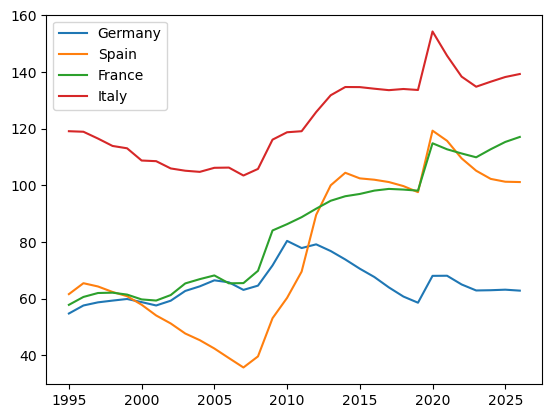

In [9]:
x = df_debt['Year']
countries = ['Germany',	'Spain', 'France', 'Italy']

for country in countries: 
    plt.plot(x, df_debt[country], label = country)

plt.legend();

In [10]:
#From wide to long
df_debt_long = pd.melt(
    df_debt,
    id_vars = 'Year',
    var_name = 'Country',
    value_name = 'Debt ratio'
)

df_debt_long    

,Year,Country,Debt ratio
0,1995,Germany,54.7487
1,1996,Germany,57.5788
2,1997,Germany,58.6861
3,1998,Germany,59.3024
4,1999,Germany,59.8711
...,...,...,...
123,2022,Italy,138.3491
124,2023,Italy,134.7936
125,2024,Italy,136.5627
126,2025,Italy,138.2173


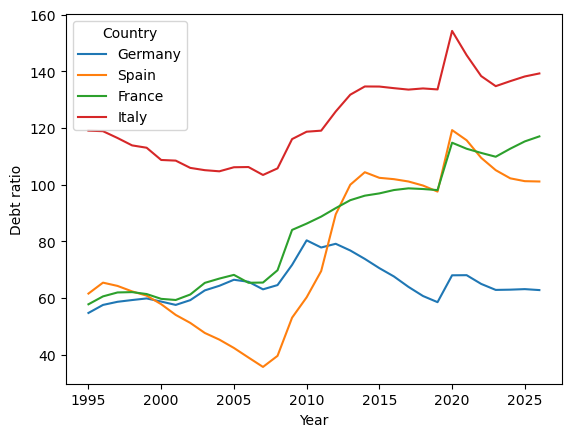

In [11]:
sns.lineplot(x = 'Year',
             y = 'Debt ratio',
             hue = 'Country',
             data = df_debt_long);

In [13]:
#From long to wide 
df_debt_wide = pd.pivot (
df_debt_long, 
    index = 'Year',
    columns = 'Country',
    values = 'Debt ratio'
).reset_index()

df_debt_wide.head()

df_debt_wide.columns.name = None 

df_debt_wide 

,Year,France,Germany,Italy,Spain
0,1995,57.8050,54.7487,119.0877,61.5864
1,1996,60.5935,57.5788,118.8964,65.4420
2,1997,61.9832,58.6861,116.4905,64.2863
3,1998,62.0997,59.3024,113.8868,62.3547
4,1999,61.4231,59.8711,113.0585,60.8531
5,2000,59.7214,58.7667,108.7428,57.8405
6,2001,59.3223,57.5837,108.5130,54.0522
7,2002,61.2560,59.2652,105.9475,51.2368
8,2003,65.3639,62.7092,105.1408,47.6869
9,2004,66.8794,64.3331,104.7376,45.3327
